In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [3]:
df['Diabetes_binary'].unique()

array([0., 1.])

In [4]:
def dataset_overview(df):
    overview = pd.DataFrame({
        "Data Type": df.dtypes,
        "Total Values": df.shape[0],
        "Unique Values": df.nunique(),
        "Missing Values": df.isna().sum(),
        "Sample Value": df.apply(lambda col: col.dropna().iloc[0] if col.dropna().size > 0 else None)
    })

    return overview

overview_table = dataset_overview(df)
print(overview_table)

                     Data Type  Total Values  Unique Values  Missing Values  \
Diabetes_binary        float64         70692              2               0   
HighBP                 float64         70692              2               0   
HighChol               float64         70692              2               0   
CholCheck              float64         70692              2               0   
BMI                    float64         70692             80               0   
Smoker                 float64         70692              2               0   
Stroke                 float64         70692              2               0   
HeartDiseaseorAttack   float64         70692              2               0   
PhysActivity           float64         70692              2               0   
Fruits                 float64         70692              2               0   
Veggies                float64         70692              2               0   
HvyAlcoholConsump      float64         70692        

### Body Mass Index (BMI)
Clarifcation : It is a numerical value that represents the relationship between your weight and height.


 Higher BMI → generally higher body fat

 Lower BMI → generally lower body fat


#### According to **cdc.gov** here's the most famous intervals

    less than < 18.5 represents Underweight

    18.5 – 24.9 represents Normal weight

    25 – 29.9 represents Overweight

    ≥ 30 represents Obesity(More severe form of excess body fat)

We can interpret from the graph that the highest frequency was between 26 and 28 **(Overweight)**

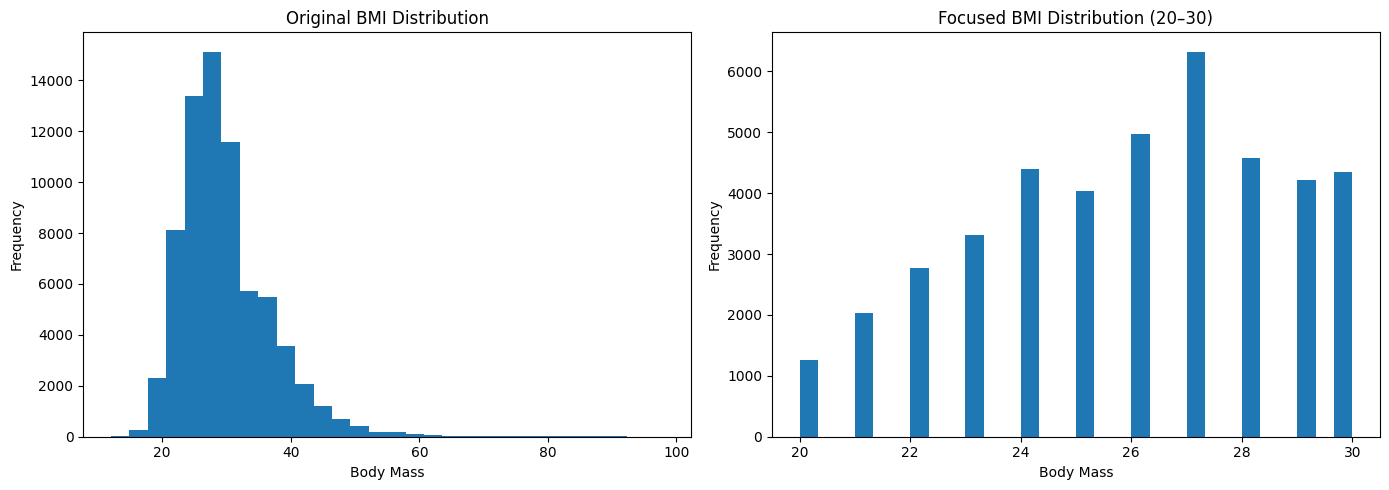

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].hist(df['BMI'], bins=30)
axes[0].set_title('Original BMI Distribution')
axes[0].set_xlabel('Body Mass')
axes[0].set_ylabel('Frequency')


focus_range = (20, 30)
subset = df[(df['BMI'] >= focus_range[0]) & (df['BMI'] <= focus_range[1])]

axes[1].hist(subset['BMI'], bins=30)
axes[1].set_title(f'Focused BMI Distribution ({focus_range[0]}–{focus_range[1]})')
axes[1].set_xlabel('Body Mass')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
smokers = df[(df['Smoker'] == 1.0)].shape[0]
smoker_and_heart = df[(df['Smoker'] == 1.0) & (df['HeartDiseaseorAttack'] == 1.0)].shape[0]
smoker_and_not_heart = df[(df['Smoker'] == 1.0) & (df['HeartDiseaseorAttack'] == 0.0)].shape[0]
smoker_and_diabetes = df[(df['Smoker'] == 1.0) & (df['Diabetes_binary'] == 1.0)].shape[0]
smoker_and_not_diabetes = df[(df['Smoker'] == 1.0) & (df['Diabetes_binary'] == 0.0)].shape[0]


#### Effect of Smoking on Heart Attack Diseases and Diabetes
Smoker in our dataset is the one who smoked at least 100 cigarettes in their entire life

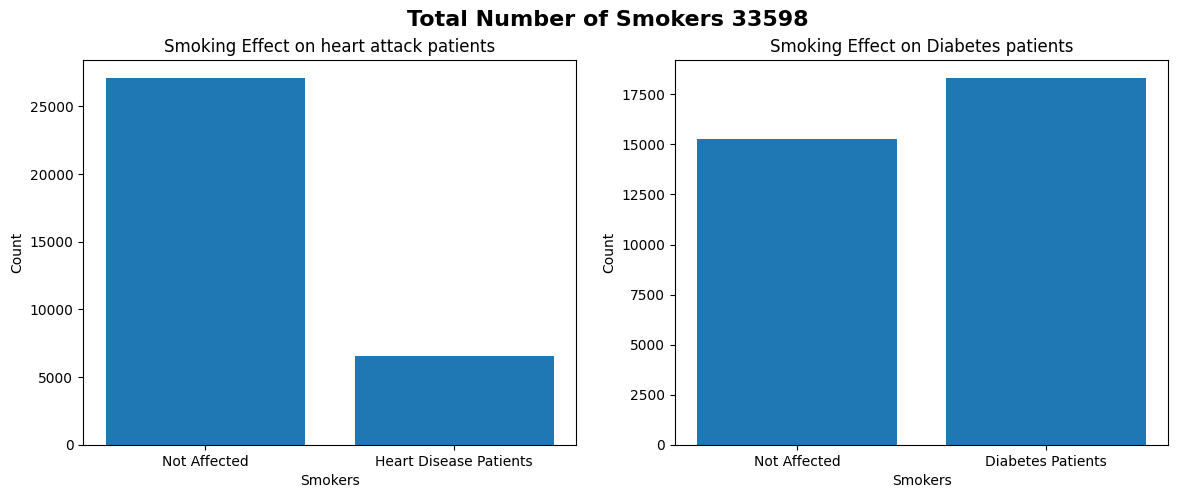

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
smoker_vs_heart = {
    "Not Affected": smoker_and_not_heart,
    "Heart Disease Patients": smoker_and_heart
}
smoker_vs_diabetes = {
    "Not Affected": smoker_and_not_diabetes,
    "Diabetes Patients": smoker_and_diabetes
}
fig.suptitle(f'Total Number of Smokers {smokers}', fontsize=16, fontweight="bold")
axes[0].bar(smoker_vs_heart.keys(), smoker_vs_heart.values())
axes[0].set_ylabel(f'Count')
axes[0].set_xlabel('Smokers')
axes[0].set_title('Smoking Effect on heart attack patients')

axes[1].bar(smoker_vs_diabetes.keys(), smoker_vs_diabetes.values())
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Smokers')
axes[1].set_title('Smoking Effect on Diabetes patients')

plt.show()

#### This graph shows the probability of having a stroke for individuals with both normal and high blood pressure.

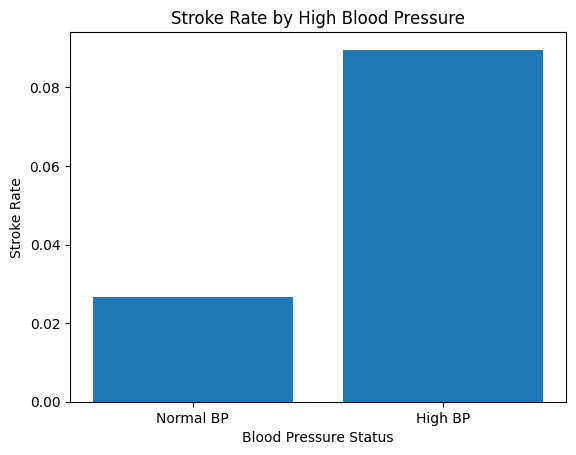

In [8]:
stroke_rate = df.groupby('HighBP')['Stroke'].mean()

plt.bar(stroke_rate.index, stroke_rate.values)
plt.xticks([0, 1], ['Normal BP', 'High BP'])
plt.ylabel('Stroke Rate')
plt.xlabel('Blood Pressure Status')
plt.title('Stroke Rate by High Blood Pressure')
plt.show()

In [9]:
high_chol = df[(df['HighChol'] == 1.0)].shape[0]
highCol_and_diabetes = df[(df['HighChol'] == 1.0) & (df['Diabetes_binary'] == 1.0)].shape[0]
highCol_and_not_diabetes = df[(df['HighChol'] == 1.0) & (df['Diabetes_binary'] == 0.0)].shape[0]

diabetes_and_check = df[(df['HighChol'] == 1.0) & (df['Diabetes_binary'] == 1.0) & (df['CholCheck'] == 1.0)].shape[0]
diabetes_and_notCheck = df[(df['HighChol'] == 1.0) & (df['Diabetes_binary'] == 1.0) & (df['CholCheck'] == 0.0)].shape[0]

The first graph shows the difference in the frequency of diabetes patients compared to those who do not have diabetes among individuals affected by high cholesterol.

The second graph shows the difference in the frequency of high cholesterol and diabetes patients who were checked at least once during the past five years compared to those who did not have a check-up.

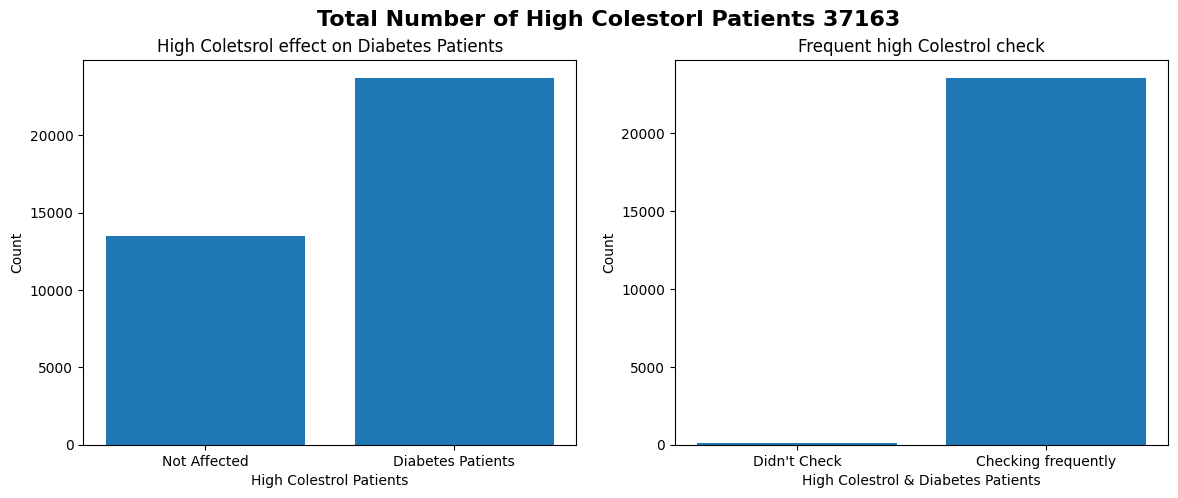

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
highCol_vs_diabetes = {
    "Not Affected": highCol_and_not_diabetes,
    "Diabetes Patients": highCol_and_diabetes
}
check_vs_diabetes = {
    "Didn't Check": diabetes_and_notCheck,
    "Checking frequently": diabetes_and_check
}
fig.suptitle(f'Total Number of High Colestorl Patients {high_chol}', fontsize=16, fontweight="bold")
axes[0].bar(highCol_vs_diabetes .keys(), highCol_vs_diabetes.values())
axes[0].set_ylabel(f'Count')
axes[0].set_xlabel('High Colestrol Patients')
axes[0].set_title('High Coletsrol effect on Diabetes Patients')

axes[1].bar(check_vs_diabetes.keys(), check_vs_diabetes.values())
axes[1].set_ylabel('Count')
axes[1].set_xlabel('High Colestrol & Diabetes Patients')
axes[1].set_title('Frequent high Colestrol check')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost"
]

df_sub = df[cols]

Plotting bar chart for visualisation and distribution

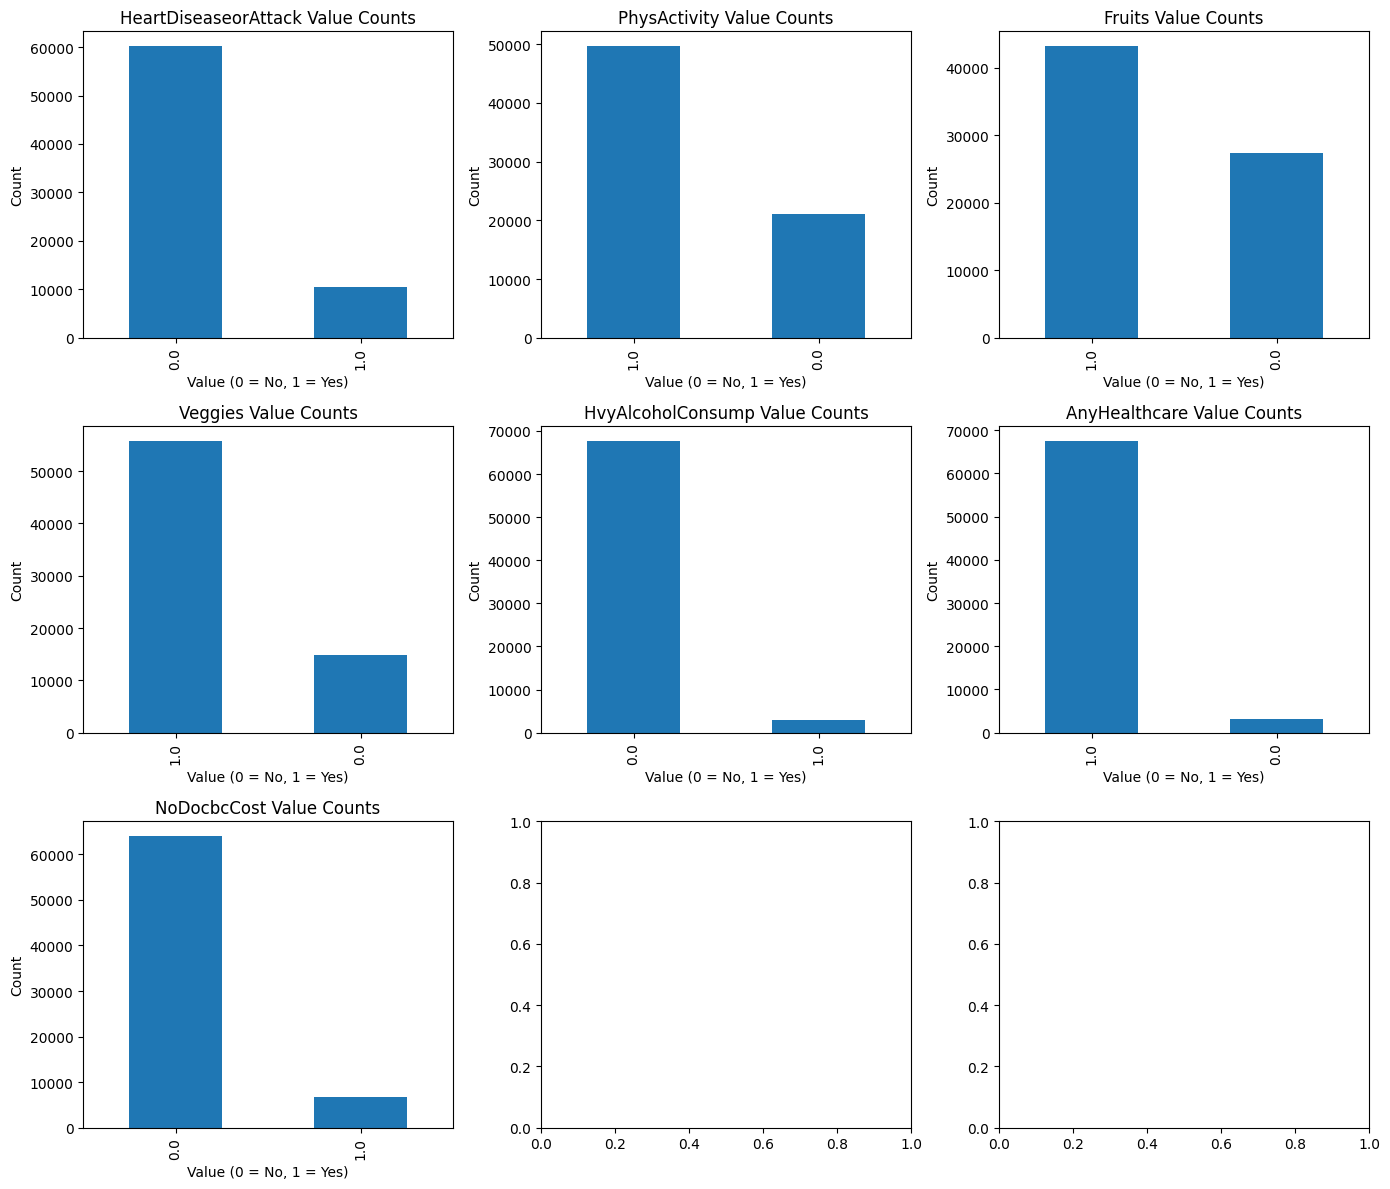

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(14,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    df_sub[col].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"{col} Value Counts")
    axes[i].set_xlabel("Value (0 = No, 1 = Yes)")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

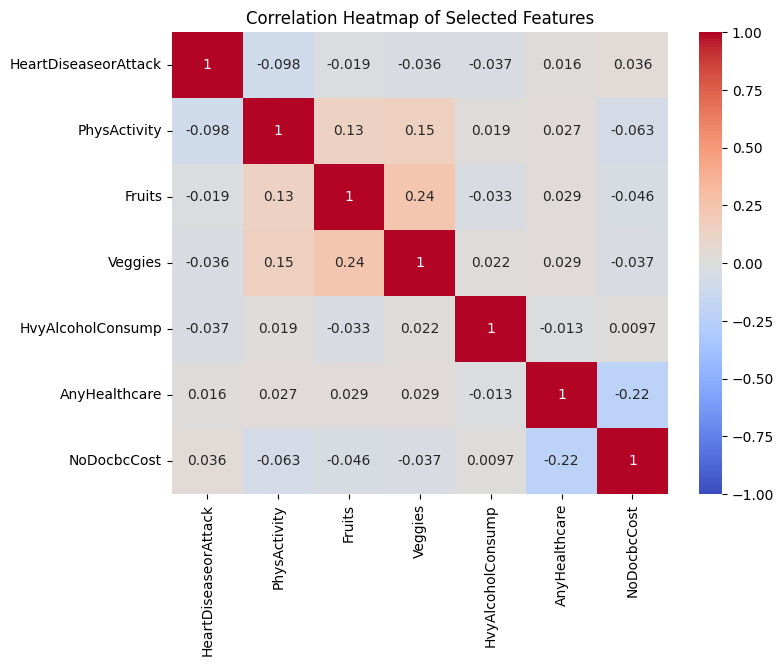

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df_sub.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

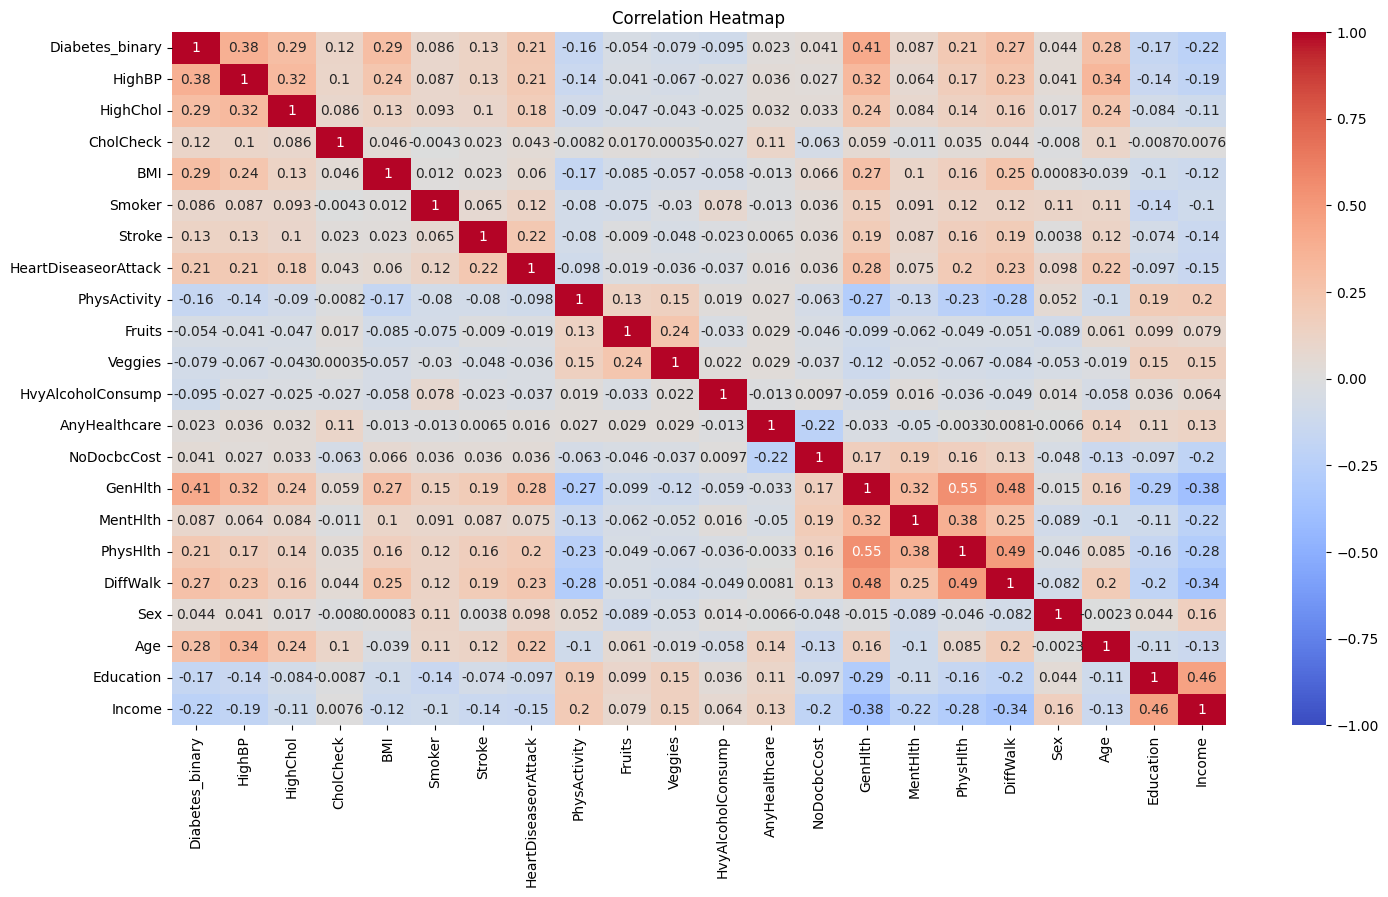

In [14]:
plt.figure(figsize=(17,9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

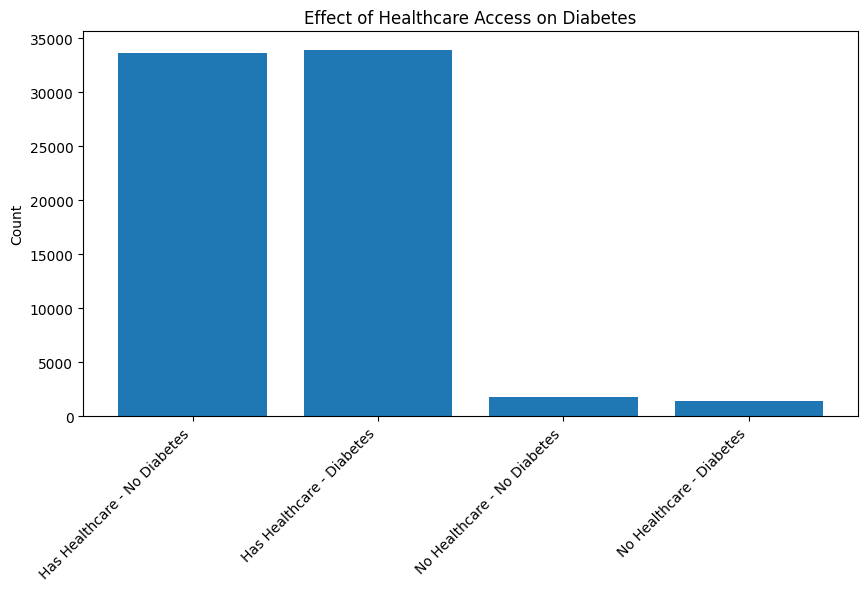

In [15]:
# AnyHealthcare vs Diabetes

hc_yes_diab = df[(df['AnyHealthcare'] == 1) & (df['Diabetes_binary'] == 1)].shape[0]
hc_yes_no_diab = df[(df['AnyHealthcare'] == 1) & (df['Diabetes_binary'] == 0)].shape[0]

hc_no_diab = df[(df['AnyHealthcare'] == 0) & (df['Diabetes_binary'] == 1)].shape[0]
hc_no_no_diab = df[(df['AnyHealthcare'] == 0) & (df['Diabetes_binary'] == 0)].shape[0]


labels = ['Has Healthcare - No Diabetes', 'Has Healthcare - Diabetes',
          'No Healthcare - No Diabetes', 'No Healthcare - Diabetes']

values = [hc_yes_no_diab, hc_yes_diab, hc_no_no_diab, hc_no_diab]

plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Effect of Healthcare Access on Diabetes')
plt.show()


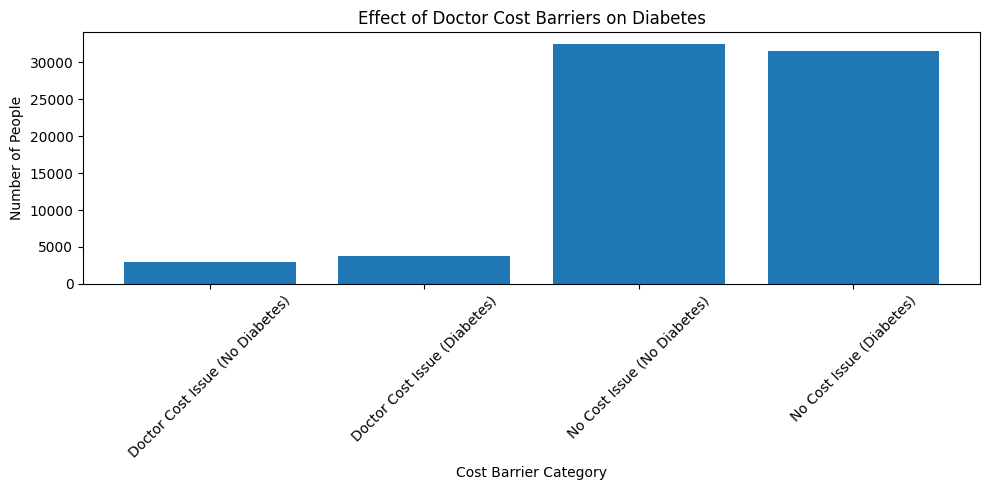

In [16]:
# NoDocbcCost vs Diabetes
cost_issue = df[(df['NoDocbcCost'] == 1)].shape[0]

cost_and_diabetes = df[(df['NoDocbcCost'] == 1) & (df['Diabetes_binary'] == 1)].shape[0]
cost_and_not_diabetes = df[(df['NoDocbcCost'] == 1) & (df['Diabetes_binary'] == 0)].shape[0]

nocost_and_diabetes = df[(df['NoDocbcCost'] == 0) & (df['Diabetes_binary'] == 1)].shape[0]
nocost_and_not_diabetes = df[(df['NoDocbcCost'] == 0) & (df['Diabetes_binary'] == 0)].shape[0]

labels = ["Doctor Cost Issue (No Diabetes)", "Doctor Cost Issue (Diabetes)",
          "No Cost Issue (No Diabetes)", "No Cost Issue (Diabetes)"]
values = [cost_and_not_diabetes, cost_and_diabetes,
          nocost_and_not_diabetes, nocost_and_diabetes]

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Effect of Doctor Cost Barriers on Diabetes")
plt.xlabel("Cost Barrier Category")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()


MentHlth:
Number of days in past 30 days where mental health was “not good”

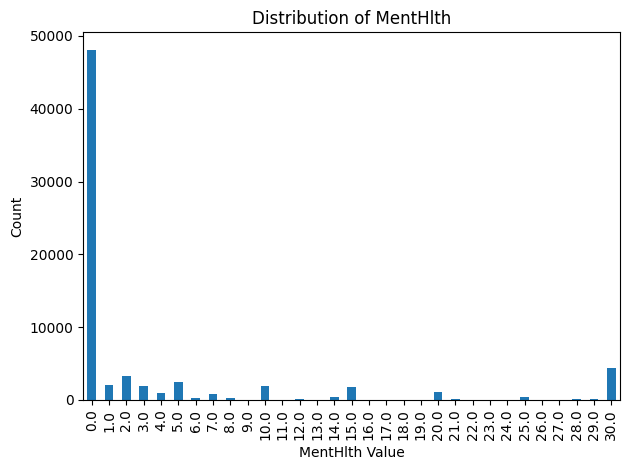

In [17]:
counts = df["MentHlth"].value_counts().sort_index()

counts.plot(kind="bar")

plt.xlabel("MentHlth Value")
plt.ylabel("Count")
plt.title("Distribution of MentHlth")
plt.tight_layout()
plt.show()

PhysHlth: Number of days in past 30 days where physical health was “not good”

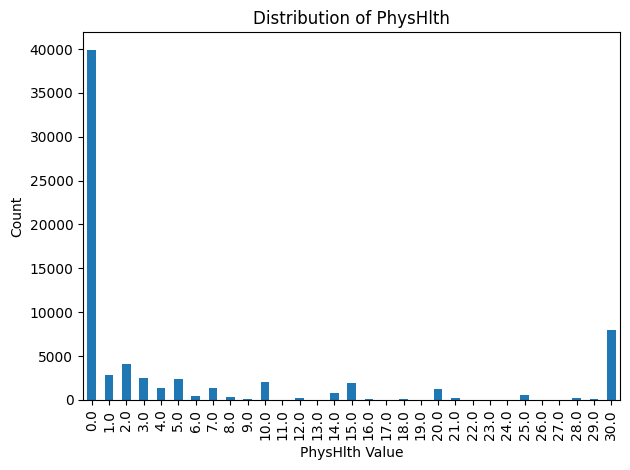

In [18]:
counts = df["PhysHlth"].value_counts().sort_index()

counts.plot(kind="bar")

plt.xlabel("PhysHlth Value")
plt.ylabel("Count")
plt.title("Distribution of PhysHlth")
plt.tight_layout()
plt.show()

DiffWalk:
Serious difficulty walking or climbing stairs

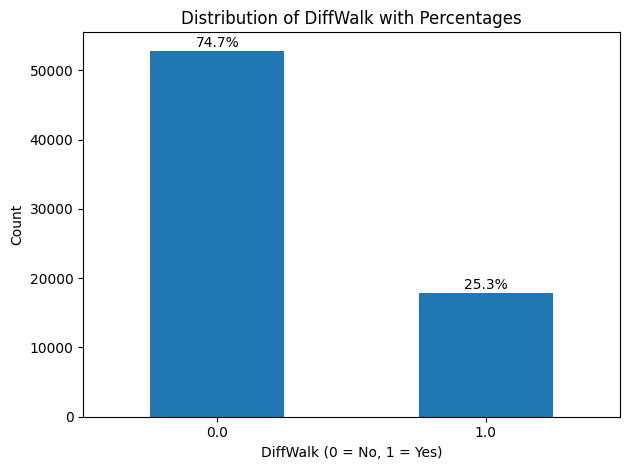

In [19]:
counts = df["DiffWalk"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

ax = counts.plot(kind="bar")

plt.xlabel("DiffWalk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of DiffWalk with Percentages")
plt.xticks(rotation=0)

for i, value in enumerate(counts):
    ax.text(i, value + max(counts)*0.01, f"{percentages[i]:.1f}%", ha='center')

plt.tight_layout()
plt.show()

**Sex:**

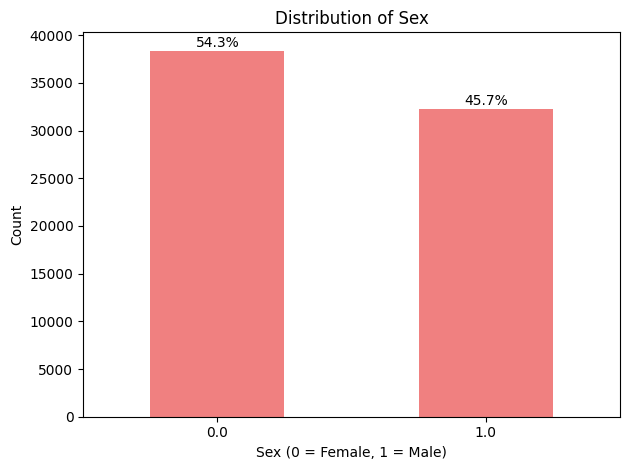

In [20]:
counts = df["Sex"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

ax = counts.plot(kind="bar", color="lightcoral")

plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.xticks(rotation=0)

for i, value in enumerate(counts):
    ax.text(i, value + max(counts)*0.01, f"{percentages[i]:.1f}%", ha='center')

plt.tight_layout()
plt.show()

**Age:**

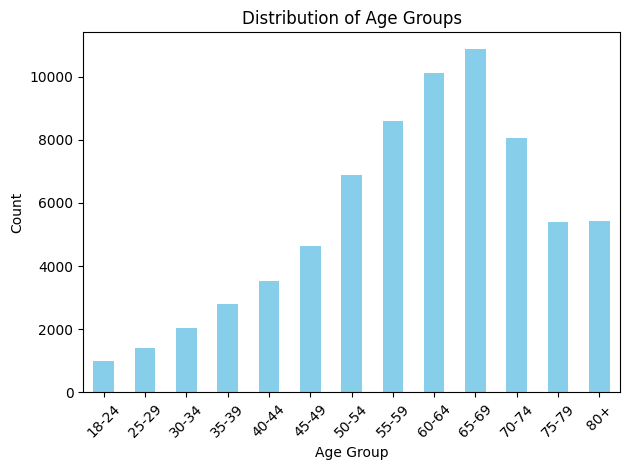

In [21]:
age_labels = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80+"
}

counts = df["Age"].value_counts().sort_index()
labels = [age_labels[i] for i in counts.index]

ax = counts.plot(kind="bar", color="skyblue")
plt.xticks(range(len(labels)), labels, rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.tight_layout()
plt.show()

**Education:**

**Education Level Codes:**

- 1 = Never attended school or only kindergarten  
- 2 = Grades 1 through 8 (Elementary)  
- 3 = Grades 9 through 11 (Some high school)  
- 4 = Grade 12 or GED (High school graduate)  
- 5 = College 1 year to 3 years (Some college or technical school)  
- 6 = College 4 years or more (College graduate)  


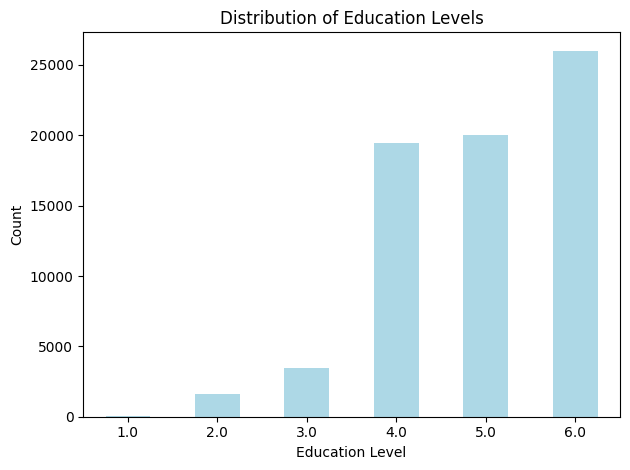

In [22]:
counts = df["Education"].value_counts().sort_index()

counts.plot(kind="bar", color="lightblue")

plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Education Levels")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Income:**

**Income Level Codes:**

- 1 = Less than $10,000

- 2 = $10,000 - $14,999

- 3 = $15,000 - $19,999  
- 4 = $20,000 - $24,999  
- 5 = $25,000 - $34,999  
- 6 = $35,000 - $49,999  
- 7 = $50,000 - $74,999  
- 8 = $75,000 or more  


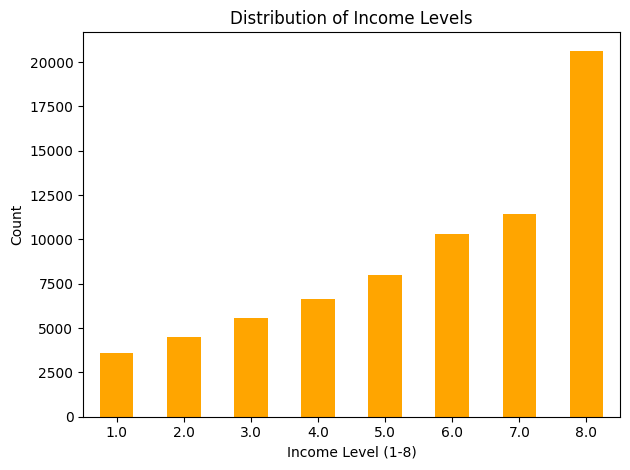

In [23]:
counts = df["Income"].value_counts().sort_index()
counts.plot(kind="bar", color="orange")

plt.xlabel("Income Level (1-8)")
plt.ylabel("Count")
plt.title("Distribution of Income Levels")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Statistical Characterization of Numerical Data

features = df.columns

desc_stats = pd.DataFrame({
    'Mean': df[features].mean(),
    'Median': df[features].median(),
    'Std Dev': df[features].std(),
    'Variance': df[features].var(),
    'Min': df[features].min(),
    'Max': df[features].max(),
})

desc_stats['Range'] = desc_stats['Max'] - desc_stats['Min']

pd.set_option('display.max_rows', None)
print(desc_stats)

                           Mean  Median    Std Dev    Variance   Min   Max  \
Diabetes_binary        0.500000     0.5   0.500004    0.250004   0.0   1.0   
HighBP                 0.563458     1.0   0.495960    0.245977   0.0   1.0   
HighChol               0.525703     1.0   0.499342    0.249343   0.0   1.0   
CholCheck              0.975259     1.0   0.155336    0.024129   0.0   1.0   
BMI                   29.856985    29.0   7.113954   50.608339  12.0  98.0   
Smoker                 0.475273     0.0   0.499392    0.249392   0.0   1.0   
Stroke                 0.062171     0.0   0.241468    0.058307   0.0   1.0   
HeartDiseaseorAttack   0.147810     0.0   0.354914    0.125964   0.0   1.0   
PhysActivity           0.703036     1.0   0.456924    0.208779   0.0   1.0   
Fruits                 0.611795     1.0   0.487345    0.237505   0.0   1.0   
Veggies                0.788774     1.0   0.408181    0.166612   0.0   1.0   
HvyAlcoholConsump      0.042721     0.0   0.202228    0.040896  

In [25]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [26]:
# Data Partitioning
np.random.seed(42)  # Ensures reproducible random operations

print("Class distribution in dataset:")
print(df['Diabetes_binary'].value_counts())  # Shows class balance
print(f"Baseline accuracy (predicting majority class): "
      f"{df['Diabetes_binary'].value_counts().max() / len(df):.4f}")

# Normalize selected continuous features using MinMax scaling
scaler = MinMaxScaler()
df[['Age', 'BMI', 'MentHlth','Income']] = scaler.fit_transform(
    df[['Age', 'BMI', 'MentHlth','Income']]
)

# Split features (X) and target (y)
# Remove healthcare-related columns as they do not help the model
X = df.drop(['Diabetes_binary','AnyHealthcare','NoDocbcCost'], axis=1).values
y = df['Diabetes_binary'].values.reshape(-1, 1)

# 10% Test split first → ensures correct proportioning
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# 20% of remaining becomes validation (i.e., final 20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

# Print dataset sizes
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Show class balance after splitting
print("\nClass distribution in splits:")
print("Train:", np.unique(y_train, return_counts=True))
print("Val:", np.unique(y_val, return_counts=True))
print("Test:", np.unique(y_test, return_counts=True))

Class distribution in dataset:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
Baseline accuracy (predicting majority class): 0.5000

Training set size: 50897
Validation set size: 12725
Test set size: 7070

Class distribution in splits:
Train: (array([0., 1.]), array([25448, 25449]))
Val: (array([0., 1.]), array([6363, 6362]))
Test: (array([0., 1.]), array([3535, 3535]))


In [ ]:
# Batching

def create_batches(X, y, batch_size=100):

    # Randomly shuffles the training data and splits it into mini-batches.
    # Used during training to perform stochastic gradient descent.

    num_samples = X.shape[0]
    indices = np.arange(num_samples)      # Index list
    np.random.shuffle(indices)            # Shuffle indices

    batches = []
    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i:i+batch_size]
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        batches.append((X_batch, y_batch))

    return batches  # Returns list of (X_batch, y_batch)

In [ ]:
# Network Architecture

class NeuralNetwork:
    def __init__(self, input_size, hidden_size):

        # Initializes a 2-layer neural network:
        # Input → Hidden (ReLU) → Output (Sigmoid)

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = 1  # Binary classification

        # He initialization for ReLU layer weights
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))

        # Output layer weights
        self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, 1))

    # Activation functions and derivatives
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivitave(self,x):  # (used internally if needed)
        s = self.sigmoid(x)
        return s * (1 - s)

    # Forward propagation 
    def forward(self, X):
        # Layer 1 (hidden layer)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2  # Predicted probabilities

    # Backpropagation and parameter update
    def backward(self, X, y, learning_rate):
        m = X.shape[0]  # Batch size

        # Output layer gradient (binary cross-entropy + sigmoid)
        dz2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        # Backprop through ReLU into hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        # Gradient descent updates
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

# Initialize network
input_size = X_train.shape[1]
hidden_size = 10
nn = NeuralNetwork(input_size, hidden_size)

print(f"\nNetwork architecture: [{input_size}, {hidden_size}, 1]")


Network architecture: [19, 10, 1]


In [29]:
# Error Calculation Function

def error_SigmoidSociety(actual_outputs, target_outputs):
    # Convert probabilities to 0/1 labels
    predicted_labels = (actual_outputs >= 0.5).astype(int)

    # Classification error vector (0 = correct, 1 = wrong)
    error_vector = np.abs(predicted_labels - target_outputs)

    # Aggregated classification error
    aggregated_error = np.mean(error_vector)

    return error_vector, aggregated_error

In [30]:
# Accuracy Evaluation Function

def accuracy_SigmoidSociety(actual_outputs, target_outputs):
    _, error = error_SigmoidSociety(actual_outputs, target_outputs)
    return 1 - error

In [31]:
# Validation Function
# This function is responsible for evaluating the validation dataset(during training) which represents only 10% from the total dataset.
def test_ValidationSet_SigmoidSociety(X, y, nn):
    y_pred = nn.forward(X)  # we are getting y-predictions of the validation dataset through forwarding 
    error_vector = y_pred - y # calculating the difference between y_pred & the original_y to show the error
    error = np.mean(np.abs(error_vector)) # Here we are taking the avg. value from the error_vector 
    accuracy = accuracy_SigmoidSociety(y_pred, y) # Here we are calculating the accuracy of the predictions by comparing them to the originals 
    return error_vector, error, accuracy

In [32]:
# Testing Function
# This function is responsible for evaluating the testing dataset(after the training phase) which represents only 20% from the total dataset.
def test_TestSet_SigmoidSociety(X, y, nn):
    y_pred = nn.forward(X) # we are getting y-predictions of the testing dataset through forwarding 
    error_vector = y_pred - y  # calculating the difference between y_pred & the original_y to show the error
    error = np.mean(np.abs(error_vector))  # Here we are taking the avg. value from the error_vector 
    accuracy = accuracy_SigmoidSociety(y_pred, y)  # Here we are calculating the accuracy of the predictions by comparing them to the originals 
    return error_vector, error, accuracy

In [33]:
# Main Training Loop

# Initialize storage for history
train_error_history = []
val_error_history = []
train_accuracy_history = []
val_accuracy_history = []

def train_network(nn, X_train, y_train, X_val, y_val, X_test, y_test,
                  learning_rate=0.01, batch_size=100, epochs=200):

    for epoch in range(epochs):
        # Create mini-batches
        batches = create_batches(X_train, y_train, batch_size)

        # Training accumulators
        total_train_error = 0
        total_train_correct = 0
        total_samples = 0

        # Training Loop
        for X_batch, y_batch in batches:
            # Forward pass
            outputs = nn.forward(X_batch)

            # Compute batch error & accuracy
            error_vector, batch_error = error_SigmoidSociety(outputs, y_batch)
            batch_accuracy = accuracy_SigmoidSociety(outputs, y_batch)

            # Accumulate totals
            batch_size_actual = len(y_batch)
            total_train_error += batch_error * batch_size_actual
            total_train_correct += batch_accuracy * batch_size_actual
            total_samples += batch_size_actual

            # Backward pass & parameter update
            nn.backward(X_batch, y_batch, learning_rate)
        y_pred = nn.forward(X_train)
        loss = np.mean(-(y_train * np.log(y_pred + 1e-10) +
                         (1 - y_train) * np.log(1 - y_pred + 1e-10))) # Binary cross-entropy loss used for classification problems


        # Compute epoch-level averages
        avg_train_error = total_train_error / total_samples
        avg_train_accuracy = total_train_correct / total_samples

        # Validation
        val_error_vector, val_error, val_accuracy = test_ValidationSet_SigmoidSociety(X_val, y_val, nn)

        # Store history
        train_error_history.append(avg_train_error)
        val_error_history.append(val_error)
        train_accuracy_history.append(avg_train_accuracy)
        val_accuracy_history.append(val_accuracy)

        # Epoch Summary
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Loss: {loss:.4f} |"
              f"Train Error: {avg_train_error:.4f} | Train Acc: {avg_train_accuracy:.4f} | "
              f"Val Error: {val_error:.4f} | Val Acc: {val_accuracy:.4f}")

    # Test Evaluation
    test_error_vector, test_error, test_accuracy = test_TestSet_SigmoidSociety(X_test, y_test, nn)

    print("\nFinal Test Results:")
    print(f"Test Error: {test_error:.4f} | Test Accuracy: {test_accuracy:.4f}")

    return (train_error_history, val_error_history,
            train_accuracy_history, val_accuracy_history)
train_network(nn, X_train, y_train, X_val, y_val, X_test, y_test,
              learning_rate=0.01, batch_size=32, epochs=100)
print("\n")

Epoch 1/100 | Loss: 0.5721 |Train Error: 0.3392 | Train Acc: 0.6608 | Val Error: 0.3928 | Val Acc: 0.6993
Epoch 2/100 | Loss: 0.5500 |Train Error: 0.2858 | Train Acc: 0.7142 | Val Error: 0.3773 | Val Acc: 0.7191
Epoch 3/100 | Loss: 0.5441 |Train Error: 0.2757 | Train Acc: 0.7243 | Val Error: 0.3581 | Val Acc: 0.7288
Epoch 4/100 | Loss: 0.5405 |Train Error: 0.2714 | Train Acc: 0.7286 | Val Error: 0.3717 | Val Acc: 0.7305
Epoch 5/100 | Loss: 0.5312 |Train Error: 0.2687 | Train Acc: 0.7313 | Val Error: 0.3585 | Val Acc: 0.7363
Epoch 6/100 | Loss: 0.5314 |Train Error: 0.2666 | Train Acc: 0.7334 | Val Error: 0.3536 | Val Acc: 0.7341
Epoch 7/100 | Loss: 0.5422 |Train Error: 0.2666 | Train Acc: 0.7334 | Val Error: 0.3480 | Val Acc: 0.7306
Epoch 8/100 | Loss: 0.5252 |Train Error: 0.2651 | Train Acc: 0.7349 | Val Error: 0.3532 | Val Acc: 0.7378
Epoch 9/100 | Loss: 0.5241 |Train Error: 0.2630 | Train Acc: 0.7370 | Val Error: 0.3535 | Val Acc: 0.7404
Epoch 10/100 | Loss: 0.5283 |Train Error: 0.26

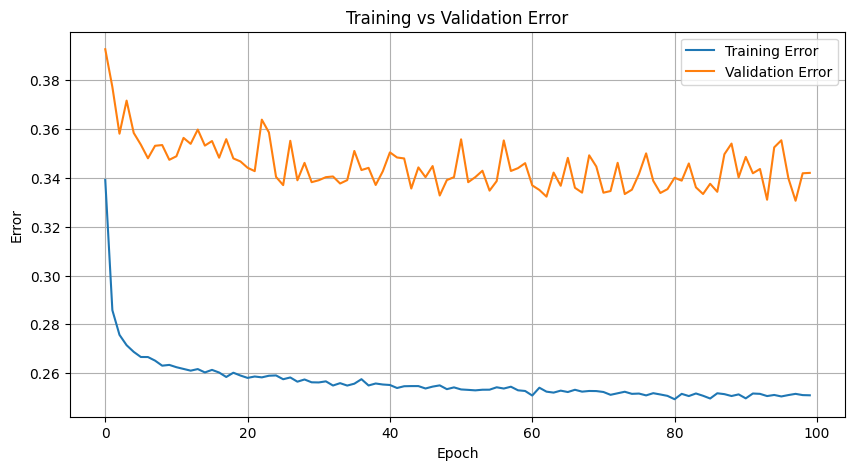

In [34]:
plt.figure(figsize=(10,5))
plt.plot(train_error_history, label='Training Error')
plt.plot(val_error_history, label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training vs Validation Error')
plt.legend()
plt.grid(True)
plt.show()

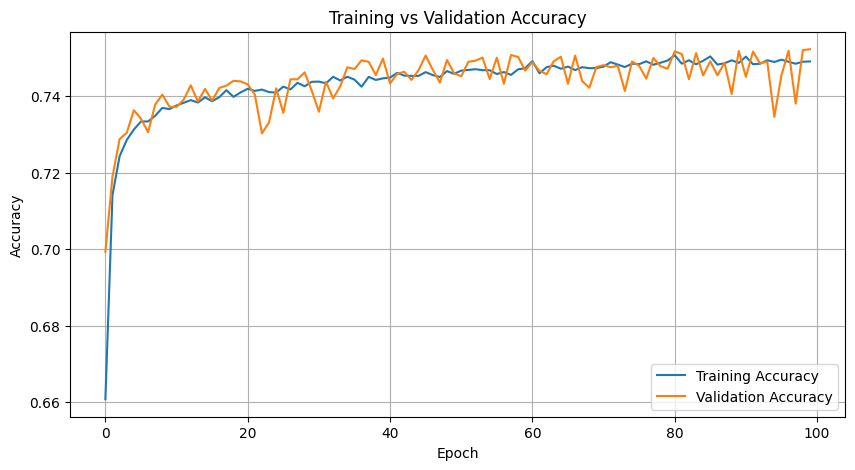

In [35]:
plt.figure(figsize=(10,5))
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

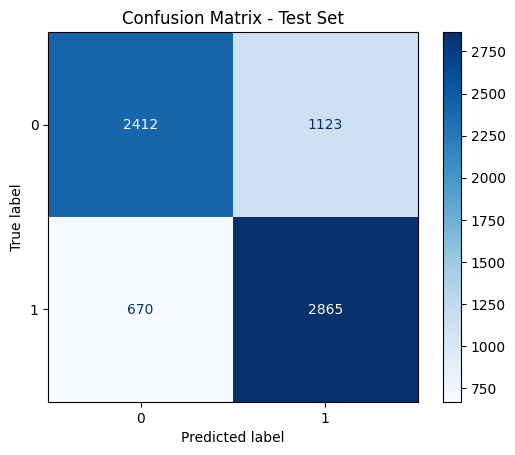

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_probs = nn.forward(X_test)
test_preds = (test_probs >= 0.5).astype(int)

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [37]:
results_df = pd.DataFrame({
    "Epoch": np.arange(1, 101),
    "Train_Error": train_error_history,
    "Val_Error": val_error_history,
    "Train_Accuracy": train_accuracy_history,
    "Val_Accuracy": val_accuracy_history
})

print(results_df)

    Epoch  Train_Error  Val_Error  Train_Accuracy  Val_Accuracy
0       1     0.339195   0.392757        0.660805      0.699332
1       2     0.285773   0.377279        0.714227      0.719057
2       3     0.275674   0.358121        0.724326      0.728802
3       4     0.271431   0.371692        0.728569      0.730452
4       5     0.268700   0.358453        0.731300      0.736346
5       6     0.266597   0.353631        0.733403      0.734145
6       7     0.266578   0.348045        0.733422      0.730609
7       8     0.265104   0.353173        0.734896      0.737839
8       9     0.263041   0.353480        0.736959      0.740432
9      10     0.263355   0.347425        0.736645      0.737289
10     11     0.262412   0.348880        0.737588      0.737210
11     12     0.261705   0.356412        0.738295      0.739096
12     13     0.260998   0.353964        0.739002      0.742868
13     14     0.261646   0.359830        0.738354      0.738625
14     15     0.260271   0.353247       